In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
file_path = '/home/ubuntu/year3/data_visualisation/Homework_sampledata1.txt'

# Open the file and process the content
with open(file_path, 'r') as file:
    data_lines = [
        [float(value) for value in line.split()[1:]]  
        for line in file.readlines()[1:]  
    ]

data_lines

[[10.5, 7.3, 10.8, 18.2, 20.0, 25.3, 27.2, 25.1, 25.8, 23.0, 24.9, 12.6],
 [9.8, 10.4, 10.7, 18.0, 25.4, 24.8, 26.6, 26.1, 26.7, 23.5, 20.9, 13.9],
 [10.7, 11.0, 11.7, 18.8, 25.4, 26.5, 27.4, 25.8, 25.1, 24.5, 20.4, 17.7],
 [15.1, 12.9, 12.4, 20.4, 26.5, 25.2, 27.2, 25.3, 26.0, 23.0, 23.1, 20.5],
 [13.5, 11.4, 16.0, 22.4, 24.0, 26.0, 26.2, 26.2, 23.5, 22.7, 22.5, 16.7],
 [16.0, 11.0, 16.7, 23.6, 24.0, 26.2, 25.5, 26.4, 24.6, 22.8, 23.8, 17.6],
 [15.8, 10.3, 17.1, 23.6, 25.1, 27.8, 25.0, 25.0, 24.7, 24.4, 19.6, 16.4],
 [15.8, 12.1, 16.9, 26.4, 25.1, 24.8, 25.8, 26.3, 25.3, 24.1, 18.5, 12.7],
 [18.0, 11.7, 17.8, 23.8, 22.5, 26.2, 25.6, 24.3, 22.7, 24.0, 17.2, 12.6],
 [20.2, -99.0, 18.0, 23.8, 19.8, 24.9, 26.8, 24.9, 23.7, 25.5, 16.0, 16.9],
 [18.3, 10.6, 17.5, 24.3, 22.4, 25.4, 27.0, 25.7, 24.9, 24.6, 16.1, 14.5],
 [20.9, 10.9, 18.1, 24.8, 23.2, 26.0, 24.6, 25.2, 25.0, 23.9, 16.9, 16.9],
 [17.4, 11.3, 19.0, 22.6, 21.4, 26.9, 27.5, 26.9, 24.5, 21.9, 17.9, 18.0],
 [14.5, 10.8, 18.5, 23.7, 

In [20]:
first_day_values = data_lines[0]

first_day_dataframe = pd.DataFrame([
    {
        'Date': f'2008-{month_index + 1:02}-01',  
        'Time': '00:00:00',  
        'Temperature': None if temp == -99 else temp 
    }
    for month_index, temp in enumerate(first_day_values)
])


first_day_dataframe

,Date,Time,Temperature
0,2008-01-01,00:00:00,10.5
1,2008-02-01,00:00:00,7.3
2,2008-03-01,00:00:00,10.8
3,2008-04-01,00:00:00,18.2
4,2008-05-01,00:00:00,20.0
5,2008-06-01,00:00:00,25.3
6,2008-07-01,00:00:00,27.2
7,2008-08-01,00:00:00,25.1
8,2008-09-01,00:00:00,25.8
9,2008-10-01,00:00:00,23.0


In [21]:

num_days = len(data_lines)
num_months = len(data_lines[0])

all_days_data = [
    {
        'Date': f'2008-{month_index + 1:02}-{day_index + 1:02}',  
        'Time': '00:00:00',  
        'Temperature': None if data_lines[day_index][month_index] == -99 else data_lines[day_index][month_index]  
    }
    for month_index in range(num_months)
    for day_index in range(num_days)
]

all_days_df = pd.DataFrame(all_days_data)
all_days_df.to_csv('all_days_data.csv', index=False)
print("Data saved to all_days_data.csv")

Data saved to all_days_data.csv


Ex1

In [24]:
all_days_df['Date'] = pd.to_datetime(all_days_df['Date'], errors='coerce')
all_days_df['Month'] = all_days_df['Date'].dt.month


<Figure size 1500x600 with 0 Axes>

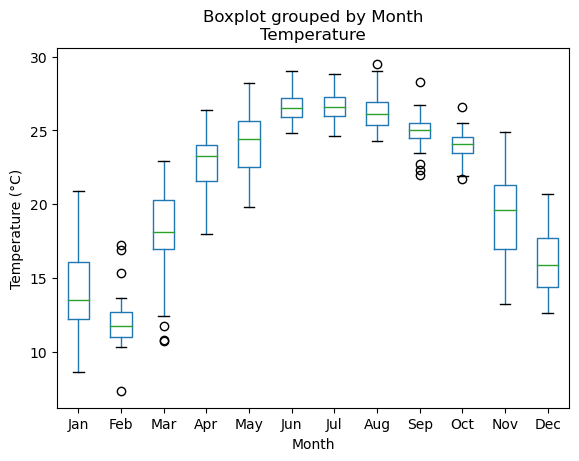

In [25]:
plt.figure(figsize=(15, 6))
all_days_df.boxplot(column='Temperature', by='Month', grid=False)
plt.ylabel('Temperature (°C)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


ex2

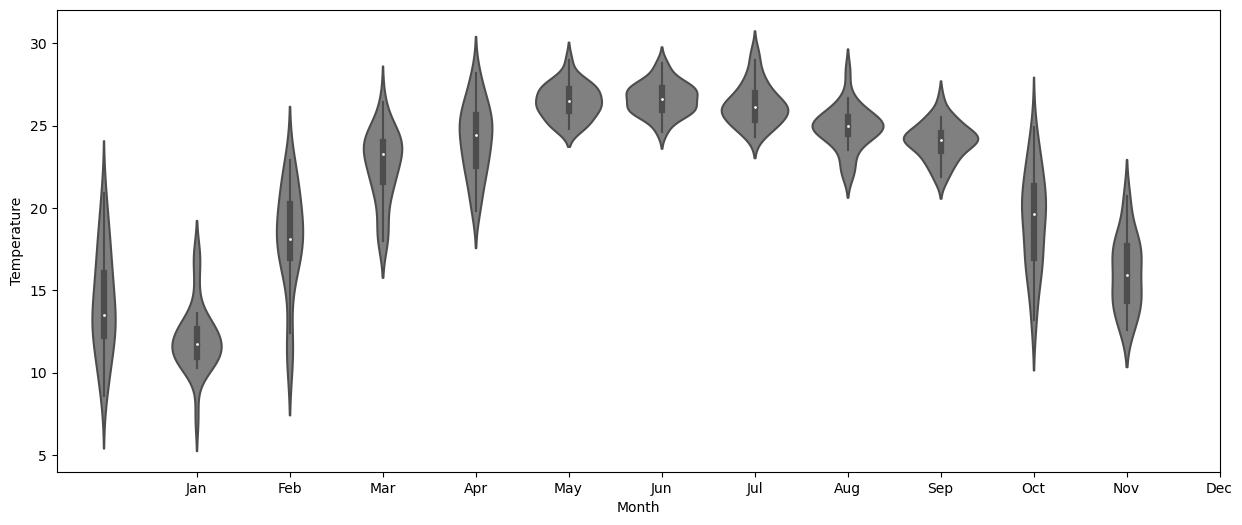

In [33]:
plt.figure(figsize=(15, 6))
sns.violinplot(x='Month', y='Temperature', color = 'grey',data=all_days_df)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

ex3

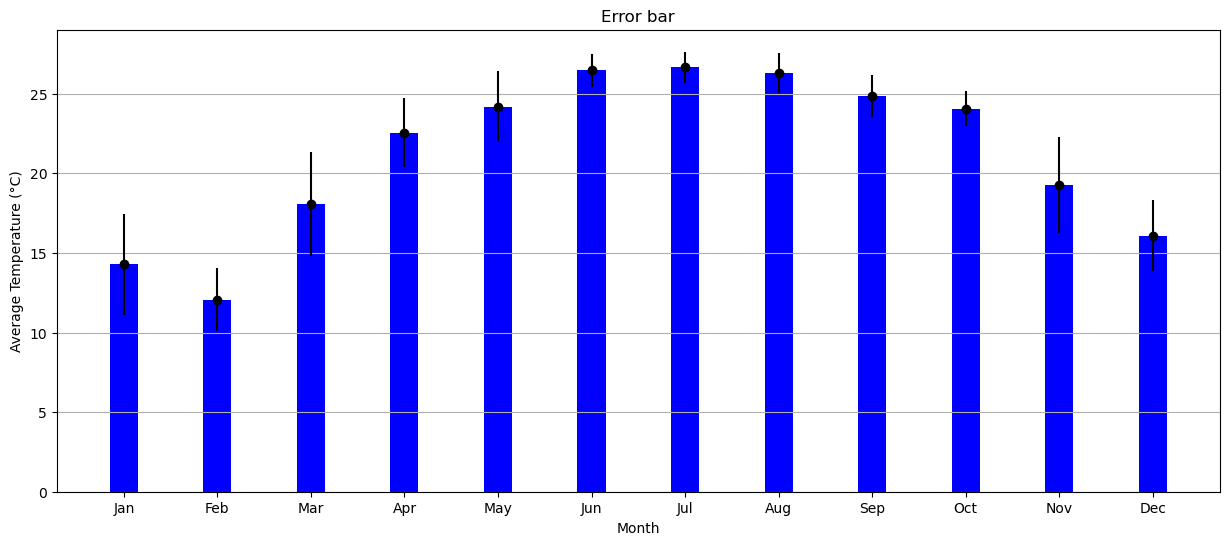

In [59]:
mean_temp = all_days_df.groupby('Month')['Temperature'].mean().reset_index()
monthly_stats = all_days_df.groupby('Month')['Temperature'].agg(['mean', 'std']).reset_index()
plt.figure(figsize=(15, 6))
plt.bar(mean_temp['Month'], mean_temp['Temperature'], color='blue', width=0.3)
plt.errorbar(monthly_stats['Month'], monthly_stats['mean'], yerr=monthly_stats['std'],fmt='o', color='black')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.title('Error bar')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.grid(axis='y')

ex4

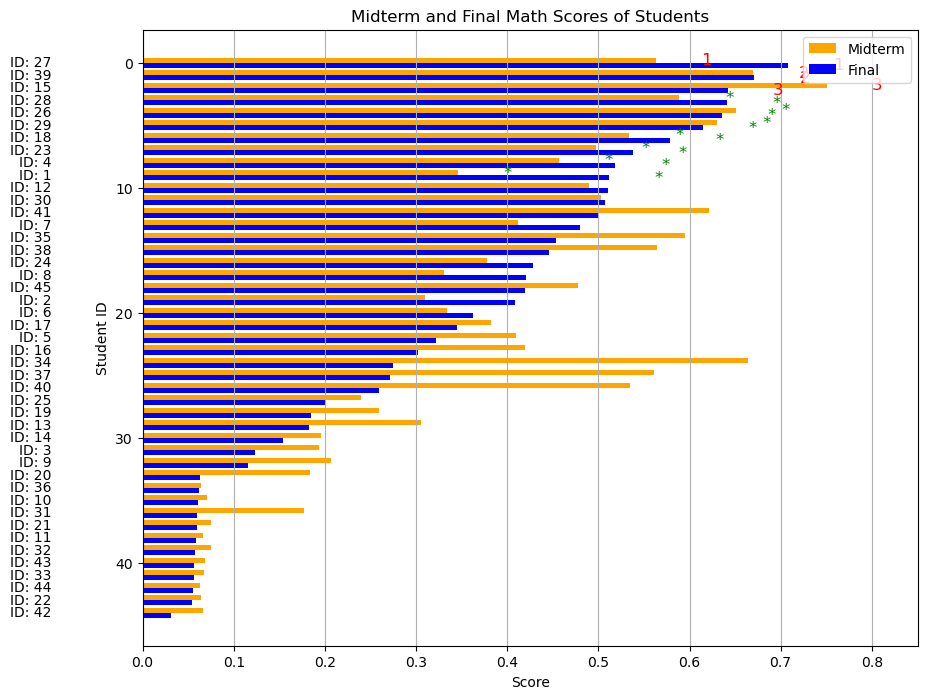

In [114]:

file_path = 'HW2_math_score.txt'
midterm_scores = []
final_scores = []

with open(file_path, 'r') as file:
    for line in file:
        mid_term, final = map(float, line.split())
        midterm_scores.append(mid_term)
        final_scores.append(final)

# Generate student IDs
student_ids = list(range(1, len(midterm_scores) + 1))

# Sort by final scores for display (you can change this to sort by midterm or both as per need)
sorted_indices = sorted(range(len(final_scores)), key=lambda i: final_scores[i], reverse=True)
sorted_midterm_scores = [midterm_scores[i] for i in sorted_indices]
sorted_final_scores = [final_scores[i] for i in sorted_indices]
sorted_student_ids = [student_ids[i] for i in sorted_indices]

# Create the plot
plt.figure(figsize=(10, 8))

# Define the bar width and positions
bar_width = 0.4
y_positions = np.arange(len(sorted_student_ids))

# Plot midterm scores
plt.barh(y_positions - bar_width/2, sorted_midterm_scores, bar_width, color='orange', label='Midterm')

# Plot final scores
plt.barh(y_positions + bar_width/2, sorted_final_scores, bar_width, color='blue', label='Final')

# Add titles and labels
plt.title('Midterm and Final Math Scores of Students')
plt.xlabel('Score')
plt.ylabel('Student ID')

# Add student IDs on the left
for i in range(len(sorted_student_ids)):
    plt.text(-0.1, i, f'ID: {sorted_student_ids[i]}', ha='right', va='center', fontsize=10, color='black')

# Highlight top 3 students and 4-10 with stars
for i in range(len(sorted_student_ids)):
    if i < 3:
        plt.text(sorted_final_scores[i] + 0.05, i + bar_width/2, str(i + 1), ha='left', va='center', fontsize=12, color='red')
        plt.text(sorted_midterm_scores[i] + 0.05, i - bar_width/2, str(i + 1), ha='left', va='center', fontsize=12, color='red')
    elif i < 10:
        plt.text(sorted_final_scores[i] + 0.05, i + bar_width/2, '*', ha='left', va='center', fontsize=12, color='green')
        plt.text(sorted_midterm_scores[i] + 0.05, i - bar_width/2, '*', ha='left', va='center', fontsize=12, color='green')

# Add grid and invert y-axis
plt.grid(axis='x')
plt.xlim(0, max(max(sorted_final_scores), max(sorted_midterm_scores)) + 0.1)
plt.gca().invert_yaxis()

# Add legend
plt.legend()

# Show plot
plt.show()





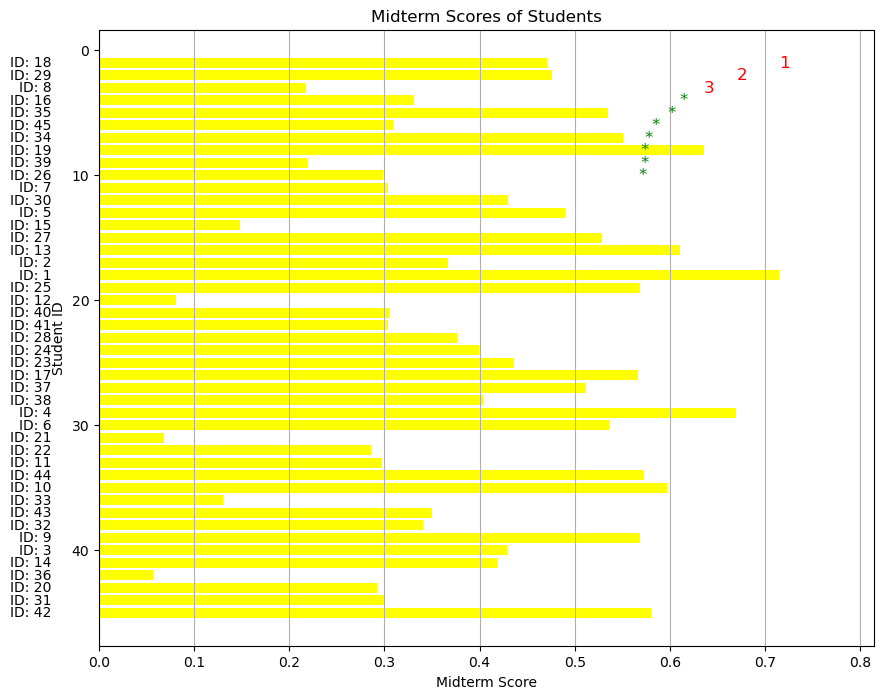

In [106]:

file_path = 'HW2_literature_score.txt'
math_scores = []

with open(file_path, 'r') as file:
    for line in file:
        mid_term, final = map(float, line.split())
        final_mathScore = (mid_term * 0.4) + (final * 0.6)
        math_scores.append(final_mathScore)

student_ids = list(range(1, len(math_scores) + 1))
sorted_indices = sorted(range(len(math_scores)), key=lambda i: math_scores[i], reverse=True)
sorted_scores = [math_scores[i] for i in sorted_indices]
sorted_student_ids = [student_ids[i] for i in sorted_indices]

plt.figure(figsize=(10, 8))
bars = plt.barh(sorted_student_ids, sorted_scores, color='yellow')
plt.title('Literature Scores of Students')
plt.xlabel('Literature Score')
plt.ylabel('Student ID')

for i, score in enumerate(sorted_scores):
    if i < 3: 
        plt.text(score, i + 1, str(i + 1), ha='left', va='center', fontsize=12, color='red')
    elif i < 10:  
        plt.text(score, i + 1, '*', ha='left', va='center', fontsize=12, color='green')
    
    plt.text(-0.05, i + 1, f'ID: {sorted_student_ids[i]}', ha='right', va='center', fontsize=10, color='black')

plt.grid(axis='x')
plt.xlim(0, max(sorted_scores) + 0.1)  
plt.gca().invert_yaxis() 
plt.show()


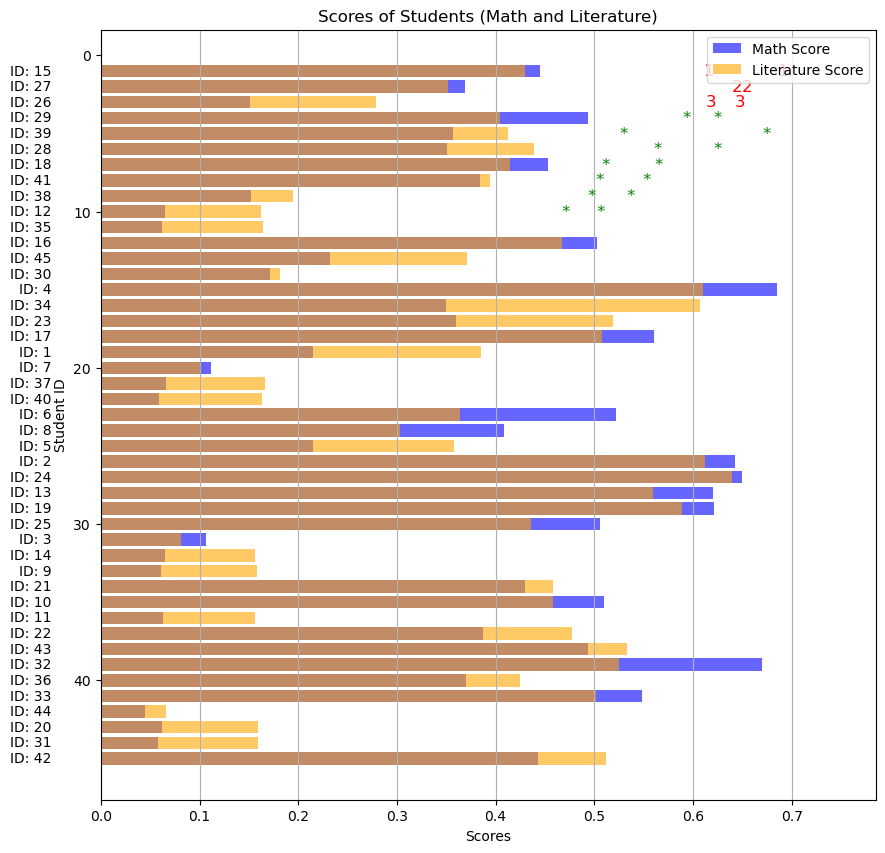

In [96]:

def read_scores(file_path, weight_midterm=0.4, weight_final=0.6):
    scores = []
    with open(file_path, 'r') as file:
        for line in file:
            mid_term, final = map(float, line.split())
            final_score = (mid_term * weight_midterm) + (final * weight_final)
            scores.append(final_score)
    return scores

# Read math scores
math_file_path = 'HW2_math_score.txt'
math_scores = read_scores(math_file_path)

literature_file_path = 'HW2_literature_score.txt'
literature_scores = read_scores(literature_file_path)

student_ids = list(range(1, len(math_scores) + 1))
sorted_indices = sorted(range(len(math_scores)), key=lambda i: (math_scores[i] + literature_scores[i]) / 2, reverse=True)
sorted_math_scores = [math_scores[i] for i in sorted_indices]
sorted_literature_scores = [literature_scores[i] for i in sorted_indices]
sorted_student_ids = [student_ids[i] for i in sorted_indices]

plt.figure(figsize=(10, 10))

bars_math = plt.barh(sorted_student_ids, sorted_math_scores, color='blue', label='Math Score', alpha=0.6)
bars_literature = plt.barh(sorted_student_ids, sorted_literature_scores, color='orange', label='Literature Score', alpha=0.6)

plt.title('Scores of Students (Math and Literature)')
plt.xlabel('Scores')
plt.ylabel('Student ID')
plt.legend()
plt.gca().invert_yaxis()

for i in range(len(sorted_student_ids)):
    plt.text(-0.05, i + 1, f'ID: {sorted_student_ids[i]}', ha='right', va='center', fontsize=10, color='black')

    if i < 3:
        plt.text(sorted_math_scores[i], i + 1, str(i + 1), ha='left', va='center', fontsize=12, color='red')
        plt.text(sorted_literature_scores[i], i + 1, str(i + 1), ha='left', va='center', fontsize=12, color='red')
    elif i < 10: 
        plt.text(sorted_math_scores[i], i + 1, '*', ha='left', va='center', fontsize=12, color='green')
        plt.text(sorted_literature_scores[i], i + 1, '*', ha='left', va='center', fontsize=12, color='green')

plt.grid(axis='x')
plt.xlim(0, max(max(sorted_math_scores), max(sorted_literature_scores)) + 0.1)  # Adjust xlim for better visibility
plt.show()



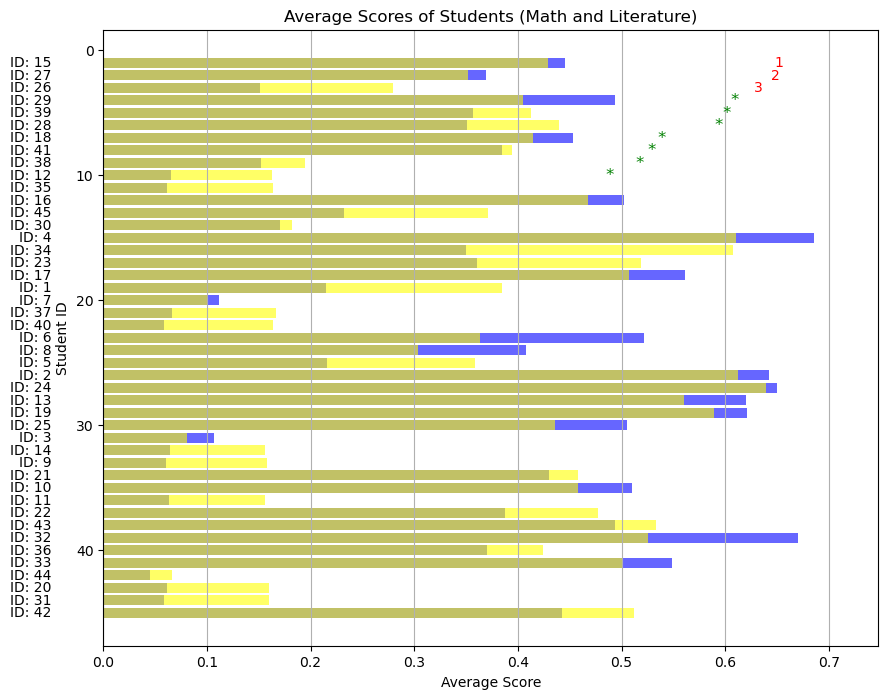

In [105]:
average_scores = [(math_scores[i] + literature_scores[i]) / 2 for i in range(len(math_scores))]

sorted_indices = sorted(range(len(average_scores)), key=lambda i: average_scores[i], reverse=True)
sorted_average_scores = [average_scores[i] for i in sorted_indices]
sorted_student_ids = [student_ids[i] for i in sorted_indices]
sorted_math_scores = [math_scores[i] for i in sorted_indices]
sorted_literature_scores = [literature_scores[i] for i in sorted_indices]

plt.figure(figsize=(10, 8))
bars_math = plt.barh(sorted_student_ids, sorted_math_scores, color='blue', label='Math Score', alpha=0.6)
bars_math = plt.barh(sorted_student_ids, sorted_literature_scores, color='yellow', label='Literature Score', alpha=0.6)
plt.title('Average Scores of Students (Math and Literature)')
plt.xlabel('Average Score')
plt.ylabel('Student ID')

for i in range(len(sorted_student_ids)):
    plt.text(-0.05, i + 1, f'ID: {sorted_student_ids[i]}', ha='right', va='center', fontsize=10, color='black')

    if i < 3:
        plt.text(sorted_average_scores[i], i + 1, str(i + 1), ha='left', va='center', fontsize=10, color='red')
    elif i < 10:
        plt.text(sorted_average_scores[i], i + 1, '*', ha='left', va='center', fontsize=12, color='green')

plt.grid(axis='x')
plt.xlim(0, max(sorted_average_scores) + 0.1)  
plt.gca().invert_yaxis() 
plt.show()